## PCA

Dimensionality Reduction.

In [1]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
from sklearn.datasets import make_classification
from sklearn.gaussian_process.kernels import RBF
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(42)

## Exercise 1

In [2]:
def get_cicle_data(n=50, r=1):
    
    np.random.seed(n)
    
    thetas = np.random.uniform(0, 2*np.pi, n)
    data = np.array([r * np.sin(thetas), r * np.cos(thetas)]).T + np.random.normal(scale=1/8, size=(n,2))
    
    return data

In [3]:
def get_gaussian_data(n, mean=0.0, sigma=1.0):
    
    np.random.seed(n)
    
    data = np.random.normal(loc=mean, scale=sigma, size=(n,2))
    
    return data

### a)

In [4]:
data, labels = make_classification(n_samples=25, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=0)

In [5]:
def scatter_plot(data, labels):
    """
    Creates a 2D scatter plot
    :param data: 2D Numpy array
    :param labels: Labels of the data
    """
    colors = ['blue' if label == 1 else 'orange' for label in labels]
    plt.scatter(data[:, 0], data[:, 1], c=colors)
    plt.show()

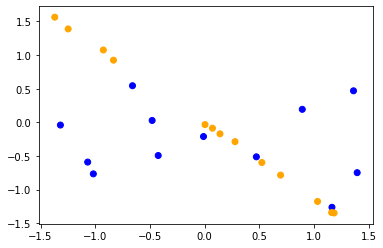

In [6]:
scatter_plot(data, labels)

### b)

In [7]:
def center_data(X):
    """
    Centers the data in X column wise
    :param X: Numpy array to be centered
    """
    assert (type(X) == np.ndarray), 'X must be of type numpy.ndarray'
    assert (X.dtype == np.double), 'X must of dtype np.double'
    n_rows = X.shape[0]
    n_columns = X.shape[1]
    for i in range(n_columns):
        column = X[:, i]
        mean = float(sum(column)) / n_rows
        # subtract the mean element wise
        X[:, i] = np.subtract(column, mean)
    return X

In [8]:
def get_desc_covariance_eigenvalues(X):
    """
    Returns the eigenvalues of X in descending order
    Shape of X must be:
        - X.shape[0] = rows of X
        - X.shape[1] = columns of X
    :param X: Numpy array
    """
    assert (type(X) == np.ndarray), 'X must be of type numpy.ndarray'
    assert (X.dtype == np.double), 'X must of dtype np.double'
    n_columns = X.shape[1]
    X_centered = center_data(X)
    cov_matrix = np.cov(X_centered.T)
    assert (cov_matrix.shape[0] == n_columns), 'Covariance matrix has wrong dimension. Try to transpose X'
    assert (cov_matrix.shape[1] == n_columns), 'Covariance matrix has wrong dimension. Try to transpose X'
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    sorted_eigenvalues = np.sort(eigenvalues)
    descending_eigenvalues = np.flip(sorted_eigenvalues, 0)
    return descending_eigenvalues

In [9]:
def get_l_largest_covariance_eigenvectors(X, l):
    """
    Returns the l largest eigenvectors of the covariance matrix of X
    :param X: Numpy array
    :param l: How many eigenvectors should be returned
    """
    assert (type(X) == np.ndarray), 'X must be of type numpy.ndarray'
    assert (X.dtype == np.double), 'X must of dtype np.double'
    n_columns = X.shape[1]
    X_centered = center_data(X)
    cov_matrix = np.cov(X_centered.T)
    assert (cov_matrix.shape[0] == n_columns), 'Covariance matrix has wrong dimension. Try to transpose X'
    assert (cov_matrix.shape[1] == n_columns), 'Covariance matrix has wrong dimension. Try to transpose X'
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    desc_eigenvalues = get_desc_covariance_eigenvalues(X)
    # index of the desc eigenvalues in the eigenvalues set
    index = [[j for j in range(len(eigenvalues)) if desc_eigenvalues[j] == eigenvalues[i]] for i in range(l)]
    largest_eigenvectors = [eigenvectors[:, i] for i in index]
    return np.array(largest_eigenvectors).reshape(l, n_columns)

In [10]:
def pca(X, l):
    """
    Returns:
        - The projection of X onto R^l (view 2)
        - The projection of X embedded in R^d (view 1)
        - All eigenvalues in descending order
        - The l largest eigenvetctors
    :param X: Numpy array
    :param l: How many eigenvectors should be returned
    """
    assert (type(X) == np.ndarray), 'X must be of type numpy.ndarray'
    assert (X.dtype == np.double), 'X must of dtype np.double'
    desc_eigenvalues = get_desc_covariance_eigenvalues(X)
    l_largest_eigenvectors = get_l_largest_covariance_eigenvectors(X, l)
    view_2 = np.matmul(l_largest_eigenvectors, X.T)
    p = np.matmul(l_largest_eigenvectors.T, l_largest_eigenvectors)
    view_1 = np.matmul(p, X.T)
    return view_2.T, view_1.T, desc_eigenvalues, l_largest_eigenvectors

In [11]:
def plot_view_1(data, labels, l):
    """
    Scatter plot the view 1 of the data
    :param data: 2D Numpy array
    :param labels: Labels of the data
    :param l: How many Eigenvectors should be used
    """
    colors = ['blue' if label == 1 else 'orange' for label in labels]
    view_2, view_1, desc_eigenvalues, l_largest_eigenvectors = pca(data, l)
    plt.scatter(view_1[:, 0], view_1[:, 1], c=colors)
    plt.show()

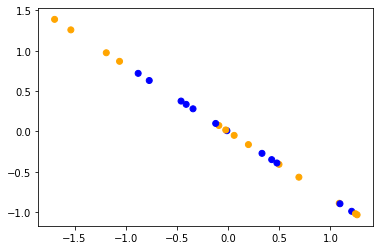

In [12]:
plot_view_1(data, labels, 1)

### c)

In [13]:
def plot_view_1_with_data(data, labels, l):
    """
    Plot the new view_1 with the old data
    :param data: 2D Numpy array
    :param labels: Labels of the data
    :param l: How many Eigenvectors should be used
    """
    colors = ['blue' if label == 1 else 'orange' for label in labels]
    view_2, view_1, desc_eigenvalues, l_largest_eigenvectors = pca(data, l)
    plt.scatter(data[:, 0], data[:, 1], c=colors, marker='o')
    plt.scatter(view_1[:, 0], view_1[:, 1], c=colors, marker='x')
    plt.show()

In [14]:
def plot_view_1_with_lines_connecting_data(data, labels, l):
    """
    Plot the new view_1 with the old data with each old data point connected to its projection
    :param data: 2D Numpy array
    :param labels: Labels of the data
    :param l: How many Eigenvectors should be used
    """
    colors = ['blue' if label == 1 else 'orange' for label in labels]
    view_2, view_1, desc_eigenvalues, l_largest_eigenvectors = pca(data, l)
    plt.scatter(data[:, 0], data[:, 1], c=colors, marker='o')
    plt.scatter(view_1[:, 0], view_1[:, 1], c=colors, marker='x')
    # To plot a line between two points: [x_0, x_1], [y_0, y_1]
    plt.plot([data[:, 0], view_1[:, 0]], [data[:, 1], view_1[:, 1]], 'k-.')
    plt.show()

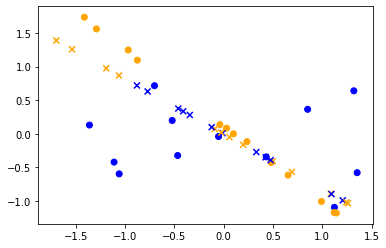

In [15]:
plot_view_1_with_data(data, labels, 1)

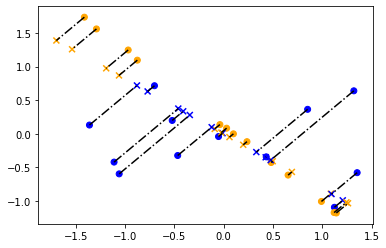

In [16]:
plot_view_1_with_lines_connecting_data(data, labels, 1)

### d)

In [17]:
a = get_cicle_data(25, 1)
b = get_cicle_data(25, 3)
data = np.concatenate([a,b])
labels = np.concatenate([np.zeros(a.shape[0]), np.ones(b.shape[0])])

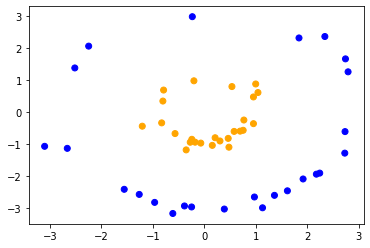

In [18]:
scatter_plot(data, labels)

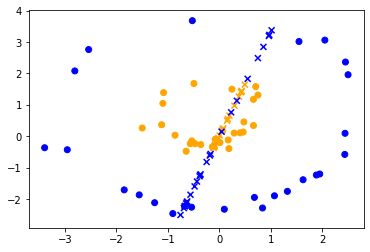

In [19]:
plot_view_1_with_data(data, labels, 1)

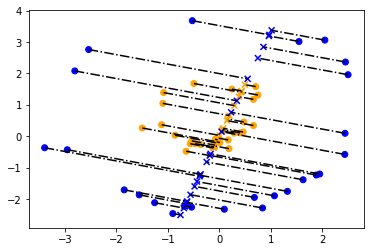

In [20]:
plot_view_1_with_lines_connecting_data(data, labels, 1)

### e)

In [21]:
data, labels = make_classification(n_samples=25, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, random_state=42, class_sep=0)
data[:, 0] = 100 * data[:, 0] 

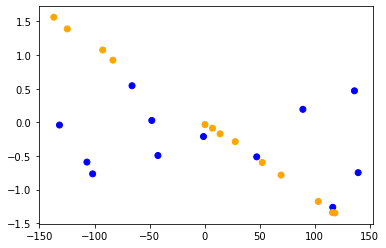

In [22]:
scatter_plot(data, labels)

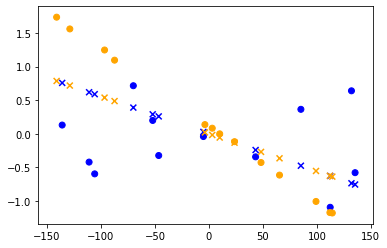

In [23]:
plot_view_1_with_data(data, labels, 1)

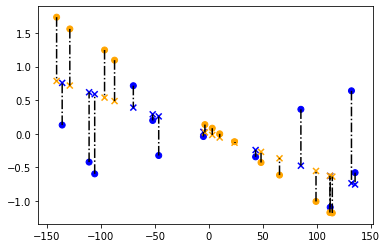

In [24]:
plot_view_1_with_lines_connecting_data(data, labels, 1)

# Exercise 2)

In [25]:
data = np.concatenate([get_cicle_data(100, 2),
                       get_cicle_data(100, 4),
                       get_cicle_data(100, 6)])

labels = np.concatenate([np.zeros(100),
                         np.ones(100),
                         2 * np.ones(100)])

### a)

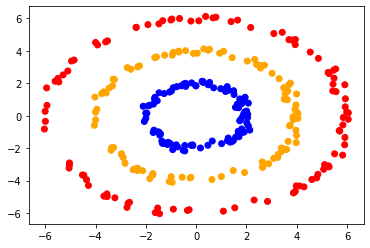

In [26]:
fig = plt.figure()
color = ['orange' if l == 1 else 'red' if l == 2 else 'b' for l in labels]
plt.scatter(data[:, 0], data[:, 1], c=color)
plt.show()

### b)

In [27]:
def calculate_matrix_v(eigenvalues, eigenvectors, l):
    """
    Returns the matrix V:
        - A_k denotes the k-column of the eigenvector matrix
        - lambda_k denotes the eigenvalue corresponding to A_k
        - Columns of V: A_k / lambda_k ^1/2
    :param l: dimension of V
    :param eigenvalues: eigenvalues of a matrix
    :param eigenvectors: eigenvectors of a matrix
    """
    V = []
    for i in range(l):
        V.append(np.divide(eigenvectors[:, i], eigenvalues[i]))
    return np.array(V)

In [28]:
def kernel_pca(X, kernel, l=2):
    """
    Implements the kernel PCA algorithm
    :param X: Dataset
    :param kernel: Kernel to be used
    :param l: Projected Dimension
    :return: Projected Dataset
    """
    assert (type(X) == np.ndarray), 'X must be of type numpy.ndarray'
    n_rows = X.shape[0]
    assert (kernel.shape == (n_rows, n_rows)), 'Kernel matrix has wrong dimension. Try to transpose X'
    kernel_inverse = np.divide(kernel, kernel.shape[0])
    centered_kernel = kernel - np.matmul(kernel_inverse, kernel) - np.matmul(kernel, kernel_inverse) + np.matmul(np.matmul(kernel_inverse, kernel), kernel_inverse)
    eigenvalues, eigenvectors = np.linalg.eig(centered_kernel)
    eigenvalues, eigenvectors = eigenvalues.real, eigenvectors.real
    V = calculate_matrix_v(eigenvalues, eigenvectors, l)
    Y = np.matmul(V, centered_kernel)
    return Y.T

### c)

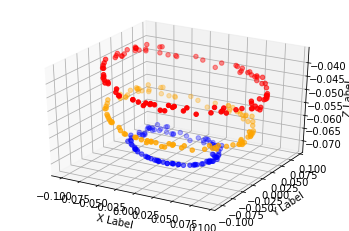

In [29]:
kernel = RBF(length_scale=5).__call__(data)
data_3d = kernel_pca(data, kernel, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=color)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### d)

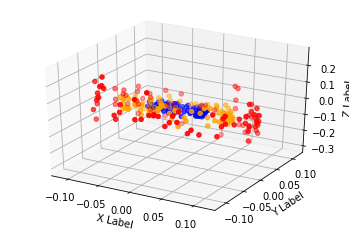

In [30]:
kernel = np.matmul(data, data.T)
data_3d = kernel_pca(data, kernel, 3)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=color)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()